# MEMO Tutorial 2 2020

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle
import numpy as np
import statistics as stats
import math

## Question 1 

1.1 Code your DFT. This algorithm uses [Jake vanderPlas's code](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)

In [76]:
# Jake vanderPlas's code for DFT 
# code for the DFT 

def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

1.2 Create and plot a fake lightcuve containing a 2.5 day sinusoidal period

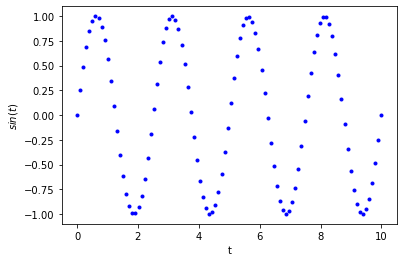

In [100]:
#Generate 100 points with values between 0 and 10
N = 100
t = np.linspace(0, 10, N)
Delta = t[1] - t[0]

# Generate sine curve with period 2.5 days
sint = np.sin(2*np.pi*t/2.5)
My_Freq = 1/2.5

plt.plot(t,sint,'b.')
plt.xlabel('t')
plt.ylabel('$sin(t)$')
plt.show()

1.3 Run DFT on the lightcurve and plot

In [99]:
my_dft = DFT_slow(sint)

First we need to __make the frequency array__.
Remember that the 0 to $N/2 - 1$ components are frequencies from 0 to $f_c=\frac{1}{2\Delta}$. In our case $\Delta = 10$, and that the negative frequencies correspond to the second half of the of the DFT array because of our choice in running $n$ from 0 to $N-1$ instead of $-N/2$ to $N/2$

In [101]:
# Make frequency array 

freq_pos = np.arange(0,N/2)/(N*Delta)
freq_neg = np.linspace(-1/(2*Delta),0,(N/2)+1.0)

freq = np.concatenate((freq_pos,freq_neg[:-1]))# Remember last element is same as first element
print(freq_pos)       
print(freq_neg)

[0.    0.099 0.198 0.297 0.396 0.495 0.594 0.693 0.792 0.891 0.99  1.089
 1.188 1.287 1.386 1.485 1.584 1.683 1.782 1.881 1.98  2.079 2.178 2.277
 2.376 2.475 2.574 2.673 2.772 2.871 2.97  3.069 3.168 3.267 3.366 3.465
 3.564 3.663 3.762 3.861 3.96  4.059 4.158 4.257 4.356 4.455 4.554 4.653
 4.752 4.851]
[-4.95  -4.851 -4.752 -4.653 -4.554 -4.455 -4.356 -4.257 -4.158 -4.059
 -3.96  -3.861 -3.762 -3.663 -3.564 -3.465 -3.366 -3.267 -3.168 -3.069
 -2.97  -2.871 -2.772 -2.673 -2.574 -2.475 -2.376 -2.277 -2.178 -2.079
 -1.98  -1.881 -1.782 -1.683 -1.584 -1.485 -1.386 -1.287 -1.188 -1.089
 -0.99  -0.891 -0.792 -0.693 -0.594 -0.495 -0.396 -0.297 -0.198 -0.099
  0.   ]


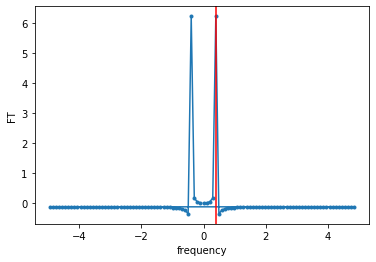

In [112]:
# plot Fourier term vs Frequency
plt.plot(freq,my_dft.real,'.-')
plt.xlabel("frequency")
plt.ylabel("FT")
plt.axvline(My_Freq,color='r')
plt.show()

1.4 & 1.5 Plot $|F(\omega)|^2$ as a function of frequency

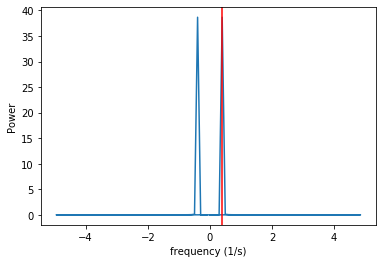

In [104]:
plt.plot(freq,abs(my_dft.real**2))
plt.xlabel("frequency (1/s)")
plt.ylabel("Power")
plt.axvline(My_Freq,color='r')
plt.show()

1.6 Numpy's FFT algorithm gives

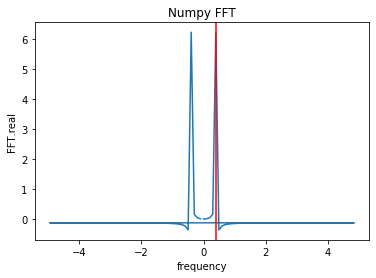

In [110]:
# Run the fft
Jfft = np.fft.fft(sint)

# Generate the array of frequencies
Jfreq = np.fft.fftfreq(sint.shape[0], Delta)

plt.plot(Jfreq, Jfft.real)
plt.xlabel("frequency")
plt.ylabel("FFT.real")
plt.title("Numpy FFT")
plt.axvline(My_Freq,color='r')
plt.show()

## Question 2
Use the Kepler lightcurve of an eclipsing binary ``09514070.00.lc.data``.

**2.1 Generate and plot a Lomb-Scargle periodogram for this lightcure. Motivate your choice of $f_\mathrm{min}$, $f_\mathrm{max}$ and $N_\mathrm{eff}$.**

In [4]:
kic = pd.read_table("../data_and_plots/Kepler/KIC_9514070/09514070.00.lc.data")

In [5]:
pd.DataFrame.head(kic)

,bjd,phase,raw_flux,raw_err,corr_flux,corr_err,dtr_flux,dtr_err
0,55834.228435,0.106438,0.968970,0.000309,1.107462,0.000371,0.975818,0.000311
1,55834.248868,0.140087,0.991215,0.000309,1.134335,0.000371,0.998221,0.000311
2,55834.269301,0.173735,1.002527,0.000309,1.147899,0.000371,1.009615,0.000311
3,55834.289735,0.207383,1.010768,0.000309,1.157753,0.000372,1.017916,0.000311
4,55834.310167,0.241031,1.014073,0.000310,1.161756,0.000372,1.021246,0.000312


In [6]:
time1 = kic.bjd[1:]
time2 = kic.bjd[0:-1]
tdiff = np.subtract(time1,time2)

print("Interval duration:", pd.DataFrame.head(pd.DataFrame(tdiff),5))

lc_duration = kic.bjd.iloc[-1] - kic.bjd.iloc[0]
print("LC duration", lc_duration, "days")


Interval duration:    bjd
0  NaN
1  0.0
2  0.0
3  0.0
4  0.0
LC duration 97.0972084899986 days


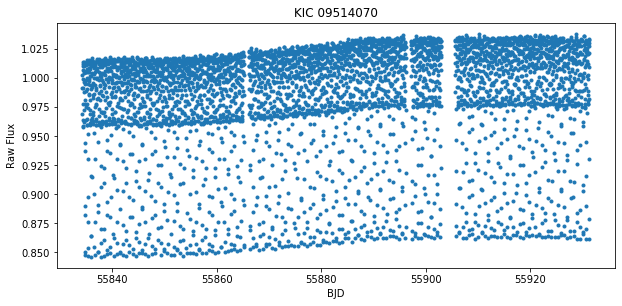

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.2)

ax.plot(kic.bjd, kic.raw_flux, '.', rasterized=True)

ax.set(xlabel='BJD',
       ylabel='Raw Flux',
       title= "KIC 09514070"
       );

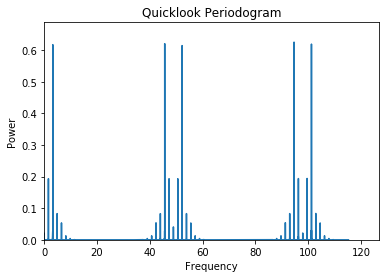

In [10]:
widefreq,widepower = LombScargle(kic.bjd,kic.raw_flux).autopower()
plt.plot(widefreq,widepower)
plt.axis([0, 1.1 *np.max(widefreq), 0, 1.1 * np.max(widepower)])
plt.title("Quicklook Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")

plt.show()

In [11]:
freq_max = widefreq[np.argmax(widepower)]
print("Peak Frequency: ",freq_max, "cycles/day")

low_freq_idx = np.where(widefreq < 20)
low_freq = widefreq[low_freq_idx]
low_pow = widepower[low_freq_idx]
low_freq_max = low_freq[np.argmax(low_pow)]
print("Lowest Peak Freq:" ,low_freq_max, "cycles/day")

Peak Frequency:  94.58871313428152 cycles/day
Lowest Peak Freq: 3.2925766350216996 cycles/day


We can see a repetitive pattern in the periodogram that looks like aliasing. The max frequency at 94.58 is just a beat between the 3.29 peak and twice the daily sampling, i.e.

$f_\mathrm{94.588} = 2f_{s} - 3.29$

Similarly, the peak at around 45 cycles per day is a beat with the sampling frequency:

$f_\mathrm{46.64} = f_{s} - 3.29$

So the aliasing is caused by the sampling. Let's focus now on frequencies below 25 cycles per day to understand those.

N_eff: 12133


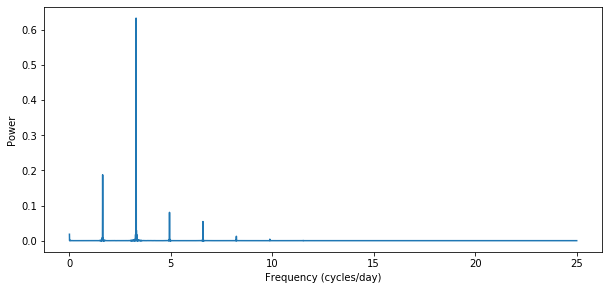

In [12]:
freq,power = LombScargle(kic.bjd,kic.raw_flux).autopower(minimum_frequency=1/lc_duration, maximum_frequency=25)
print("N_eff:",len(freq))

fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.2)

ax.plot(freq, power)

ax.set(xlabel='Frequency (cycles/day)',
       ylabel='Power',
       );

- $f_\mathrm{min}$ is motivated by the inverse of the time series duration.
- $f_\mathrm{max}$ is motivated by the aliasing pattern which we understand to be due to the sampling
- N$_\mathrm{eff}$ is determined from the grid spacing $\Delta f = 1/n_0T$ between $f_\mathrm{min}$ and $f_\mathrm{max}$, where $n_0 = 5$, $f_\mathrm{max}  = 25$ and $T = 97$, hence in my case $N_\mathrm{eff}\approx 12125$.


**2.2 Find the peak frequency and fold the lightcurve at this frequency. Is this the orbital period of the binary? Substantiate your answer with text and more plots if needed.**

In [13]:
freq_max = freq[np.argmax(power)]
print("Peak Frequency: ",freq_max, "cycles/day")


Peak Frequency:  3.293606530747387 cycles/day


Let's fold the lightcurve at this period to investigate

In [35]:
def phase_up(time_arr, period):
    phase = np.linspace(0,1,len(time_arr))
    phase = 1/period*(time_arr - time_arr[0])%1 # This %1 gives only the fractional part of the number
    return phase

In [34]:
phase = phase_up(kic.bjd,1/freq_max)

NameError: name 'kic' is not defined

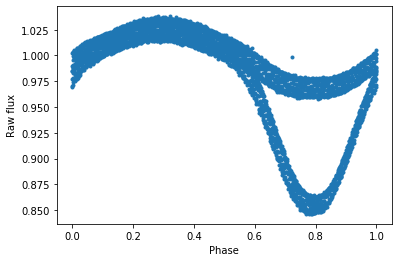

In [15]:
plt.plot(phase,kic.raw_flux,'.')
plt.xlabel("Phase")
plt.ylabel("Raw flux")
plt.show()

The phase folded lightcurve above does not look right. Half the time, the star seems to have a deep dip at 0.8, and the other half of the time it's much shallower at this phase. Do we have the right period? Let's go back and do some detective work around the periodogram. We can see a bunch of evenly spaced peaks - are they the harmonics?

Remember for harmonics $f_n = n \times f_0$, where $f_0$ is the fundamental frequency.

To the right of the 3.29 cycles/day, the next strongest peak is at a frequency of $4.94$, which is $1.5\times f_0$, if $f_0 = 3.29$. Could it be the case that the peak at 3.29 cycles per day is not the fundamental frequency?

The peak to the left of the maximum is at exactly half of the peak frequency. That gives us the clue that **this frequency at 1.65 cycles per day is $f_0$**, and the rest of the peaks are harmonics of $f_0$. See the illustration below.

Let's fold the lightcurve at the real fundamental frequency now -- see below. **This** is the orbital period. We can see the eclipse clearly, which is preceded and followed by smaller, sinusoidal increases in flux as the deformed companion star changes its orientation with respect to our line of sight.

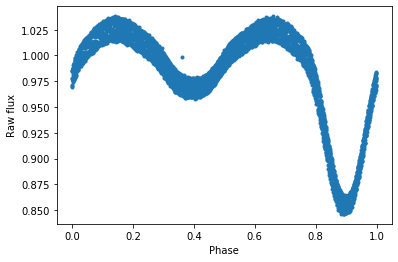

In [16]:
phase = phase_up(kic.bjd,2./freq_max)
plt.plot(phase,kic.raw_flux,'.')
plt.xlabel("Phase")
plt.ylabel("Raw flux")
plt.show()

**2.3 Write your own bootstrapping code to determine if the measured period is significant at the $99\%$ level.**

In [17]:
n = len(kic.bjd)

l_peak_power = []

for i in range (0,999):
    #Scramble the data points
    my_random = np.random.rand(n) #This gives me a uniform distribution
    rand_args = np.argsort(my_random)
    rand_mags = kic.raw_flux[rand_args]

    #Now do the Lomb Scargle
    f_rand, pow_rand = LombScargle(kic.bjd, rand_mags).autopower()
    #find the peak power and keep it somewhere
    l_peak_power.append(pow_rand[np.argmax(pow_rand)]) #Add this onto the list of peak powers

#Now sort peak_power in ascending order    
sl_peak_power = np.sort(l_peak_power)

In [18]:
# 99/100 * 1000 = 990, so we must find the 989th element of the sorted peak power array
print("99% significance at ",sl_peak_power[989])

99% significance at  0.047612164054540725


The fundamental has a power of $\approx0.2$, so it *is* significant at the 99% level.

**2.4 How does the above result compare with the Horne & Baliunas false alarm probability?**

In [3]:
Neff = np.max(freq) * lc_duration # This is a factor of 10 lower than my number of frequencies in the array,
#because they are not all independent

Z = 0.2 #for the fundamental
Psingle = 1 - math.exp(-1*Z)
print("Psingle",Psingle)

FAP = (1 - Psingle)**Neff
print(FAP)

NameError: name 'freq' is not defined

The Horne & Baliunas estimate gives a very conservative value of the FAP. Given the dataset, it estimates that there is a very strong (100%!) chance of getting a peak value of 0.2 across the roughly 2500 independent frequencies probed in the periodogram. We can see that this is vastly different from the FAP (= 1 - significance) we determined from the bootstrapping above.

**2.5 A number of peaks are visible in the Lomb-Scargle periodogram. Explain what they are in terms of aliasing and harmonic.**

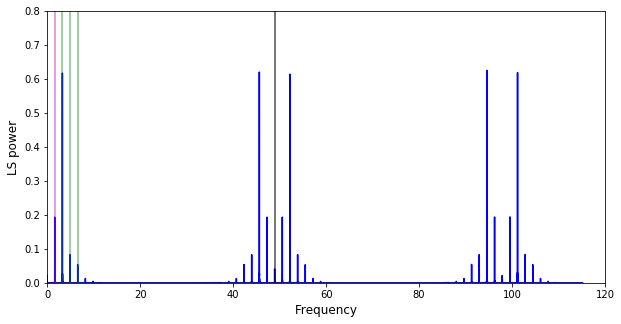

In [21]:
f_sampling = 1/(0.020433)
f0 = 0.5*3.293606530747387

plt.subplots(figsize=(10, 5))
plt.plot(widefreq,widepower,'b')
plt.xlabel("Frequency",fontsize=12)
plt.ylabel("LS power",fontsize=12)
plt.ylim([0.0,0.8])
plt.xlim([0,120])

plt.axvline(f0,color='m',alpha = 0.5) # f0, in pink
plt.axvline(2*f0,color='g',alpha = 0.5) #1st harmonic, in green
plt.axvline(3*f0,color='g', alpha= 0.5)# 2nd harmonic, in green
plt.axvline(4*f0,color='g',alpha = 0.5) #3rd harmonic
plt.axvline(f_sampling, color='black',alpha=0.7)
plt.show()

In the plot above the fundamental frequency ($f_0$, the binary orbit) is shown in <span style="color:magenta">pink</span>, and its harmonic are highlighted in <span style="color:green">green</span>. The <span style="color:gray">grey</span> line shows the sampling frequency, and the peaks around this frequency are aliases between the fundamental, its harmonics and the sampling frequency. The family of aliases repeats at higher frequencies.

**2.6 Quote the error on the period:**

**a) by estimating it from the width of the periodogram peak**

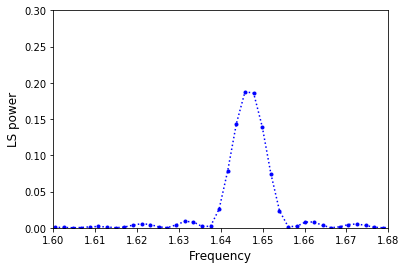

In [22]:
plt.plot(freq,power,'b.',ls=":")
plt.xlim([1.6,1.68])
plt.ylim([0,0.3])
plt.xlabel("Frequency",fontsize=12)
plt.ylabel("LS power",fontsize=12)
plt.show()

From this zoomed in version of the fundamental in the periodogram, we can estimate the FWHM of the peak to be 1.652 - 1.644 = 0.008 cycles/day. Then $\sigma=\mathrm{FWHM}/2.54 = 0.0031496$. So the error in the period is $\Delta P = 1/f^2\Delta f = 0.001$ days.  

$P = 0.607\pm 0.001$ days

This is significantly larger than the error of 0.00002 days in the [eclipsing binary catalogue](http://keplerebs.villanova.edu/overview/?k=9514070).

**b) by running a bootstrap-with-replacement algorithm**

In [23]:
#this code is not finished and I'll have to add it later.
rand_lc= np.zeros_like(kic.bjd)

N = 100 #number of simulations

rand_freq = np.zeros(N); rand_pow = np.zeros(N)
#In this case I test it by replacing 100% of the sample
for n in range (0,N):
    
    #shuffle ligthcurve values in error bars
    for i in range(0,len(kic.bjd)-1):
        rand_lc[i] = kic.raw_err[i] * np.random.randn() + kic.raw_flux[i]
        
    freq,power = LombScargle(kic.bjd,rand_lc).autopower(minimum_frequency=1/lc_duration, maximum_frequency=25)
        
    rand_pow[n] = np.max(power)
    rand_freq[n] = freq[np.argmax(power)]
    
#print(rand_pow, rand_freq)


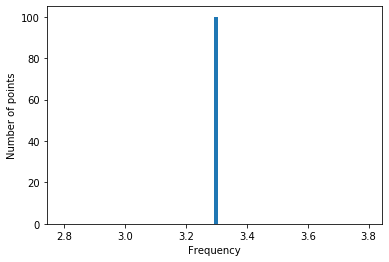

In [24]:
plt.hist(rand_freq,bins=100)
plt.xlabel("Frequency")
plt.ylabel("Number of points")
plt.show()

As can be seen from the figure above, all of the 100 periodograms we generated have their peak power at exactly the same frequency, so this method of shuffling the data points within their error bars **does not work** to generate a estimate of the error bar on the frequency itself.

Another, more precise expression (but still an estimate) of this is given by Ivezic et al. (2014), where the inverse curvature of the periodogram peak can be identified with the uncertainty:

$\sigma_f\approx f_{1/2}\sqrt{\frac{2}{N\Sigma^2}}$

Here , $N$ is the number of samples, and $\Sigma$ is the average signal-to-noise.

In [25]:
# for our data, this becomes 
big_sig = np.mean(kic.raw_flux/kic.raw_err)
sig_f = 0.004*math.sqrt(2/(len(kic.bjd)*(big_sig)**2))
print(sig_f)

2.7112371747600074e-08


Both these estimates are far from the 0.00002 day uncertainty on the folding period in the [eclipsing binary catalogue](http://keplerebs.villanova.edu/overview/?k=9514070).

## Question 3

Period analysis for the lightcurve *lc100099.dat*.

In [3]:
colnames = ["hjd", "cam", "mag", "magerr", "fl","dfl"]
lc = pd.read_csv("../data_and_plots/lc100099.dat", delim_whitespace=True, skiprows=3, names=colnames, 
                  dtype ={'hjd': np.float32, 'cam':str, 'mag': np.float32, 'magerr': np.float32,
                         'fl':str, 'dfl':str})
pd.DataFrame.head(lc)

,hjd,cam,mag,magerr,fl,dfl
0,2456701.25,bb,12.144,0.015494,53.237,0.759
1,2456730.25,bb,12.182,0.015494,51.397,0.733
2,2456735.00,bb,12.105,0.023241,55.179,1.18
3,2456736.00,bb,12.096,0.023241,55.674,1.19
4,2456744.00,bb,12.058,0.023241,57.614,1.232


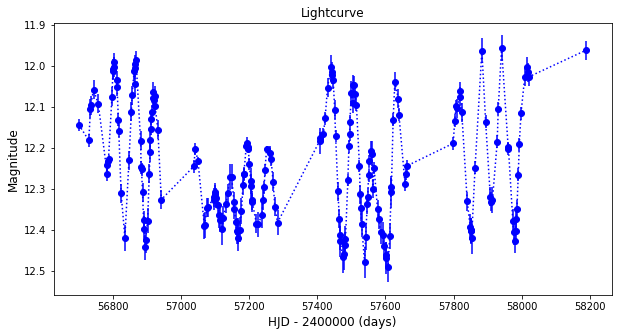

In [4]:
ax = plt.subplots(figsize=(10,5))
plt.errorbar(lc.hjd - 2400000,lc.mag,yerr=lc.magerr,
             color='blue', marker='o',ls=':')
plt.gca().invert_yaxis()
plt.xlabel("HJD - 2400000 (days)",fontsize="12")
plt.ylabel("Magnitude",fontsize="12")
plt.title('Lightcurve')
plt.show()

In [11]:
lc.hjd[len(lc.hjd)-1]

2458189.0

In [28]:
# 3.1 Run and plot the periodogram, motivating the choices for the frequencies

T = lc.hjd[len(lc.hjd)-1] - lc.hjd[0]
freq,power=LombScargle(lc.hjd,lc.mag).autopower(minimum_frequency=1/T, maximum_frequency = 2.5)

print("Length of lightcurve, T: ", T)


Length of lightcurve, T:  1487.75


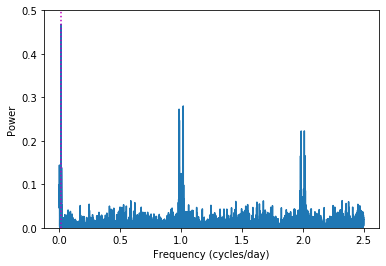

In [29]:
plt.plot(freq,power)
plt.axvline(f_max,color='m',ls=':')
plt.ylim([0,0.5])
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")
plt.show()

__Motivation for frequency grid:__  
We can see structure in the data that looks like aliasing around the 1.0 and 2.0 cycles per day, so our choice of $f_\mathrm{max}$ is the sampling frequency, i.e. 1.0 cycle per day. Our choice of $f_\mathrm{min}$ is the length of the lightcurve, i.e. 1487 days. Our choice of $N_\mathrm{eff}$ is such that we oversample frequencies by a factor of 5, hence justifying our choice below.

In [30]:
mfreq, mpower = LombScargle(lc.hjd,lc.mag).autopower(samples_per_peak=5,
                                                         minimum_frequency=1/T,
                                                         maximum_frequency = 0.8)

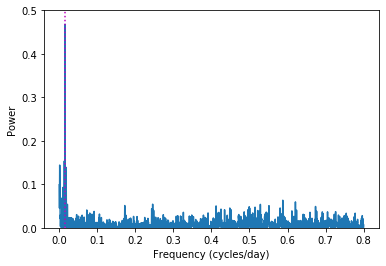

In [31]:
plt.plot(mfreq,mpower)
plt.axvline(f_max,color='m',ls=':')
plt.ylim([0,0.5])
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")
plt.show()

In [32]:
## 3.3 Find peak frequency and fold at this period
f_max = freq[np.argmax(mpower)]
print("Freq_max: ", f_max)
print("Period_max: ",1/f_max )
print("1st harmonic: ", 2*f_max)
print("Period harmonic: ", 1/(2*f_max))

Freq_max:  0.01572844900016804
Period_max:  63.57905982905982
1st harmonic:  0.03145689800033608
Period harmonic:  31.78952991452991


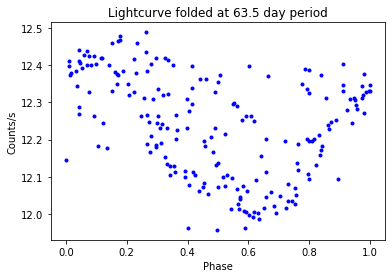

In [38]:
# Now fold the lightcurve 
phase = phase_up(lc.hjd,1/f_max)

plt.plot(phase,lc.mag,'b.')
plt.xlabel("Phase")
plt.ylabel("Counts/s")
plt.title("Lightcurve folded at 63.5 day period")
plt.show()



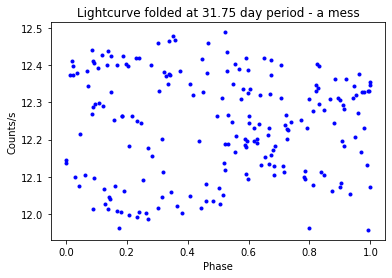

In [39]:
phase2 = phase_up(lc.hjd,1/(2*f_max))

plt.plot(phase2,lc.mag,'b.')
plt.xlabel("Phase")
plt.ylabel("Counts/s")
plt.title("Lightcurve folded at 31.75 day period - a mess")
plt.show()

# Looks funny, try to phase bin the data

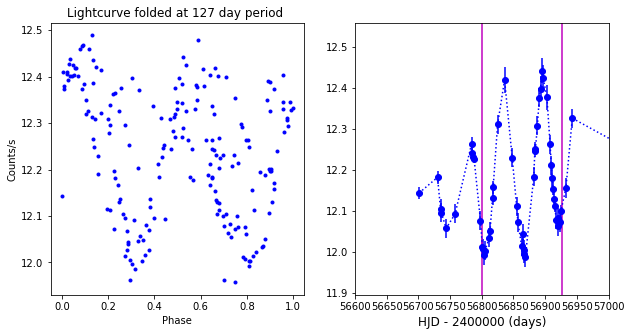

In [57]:
phase2 = phase_up(lc.hjd,2/(f_max))

fig, ax = plt.subplots(figsize=(10, 5))
ax1 = plt.subplot(121)

ax1.plot(phase2,lc.mag,'b.')
ax1.set_xlabel("Phase")
ax1.set_ylabel("Counts/s")
#ax1.gca().invert_yaxis()
ax1.set_title("Lightcurve folded at 127 day period ")


ax2 = plt.subplot(122)
ax2.errorbar(lc.hjd - 2400000,lc.mag,yerr=lc.magerr,
             color='blue', marker='o',ls=':')
#ax2.gca().invert_yaxis()
ax2.set_xlim([56600,57000])
ax2.set_xlabel("HJD - 2400000 (days)",fontsize="12")
ax2.axvline(56800,color='m')
ax2.axvline(56927, color="m")
#plt.ylabel("Magnitude",fontsize="12")
#plt.title('Lightcurve')

plt.show()

It's clear from the investigation above that the period in the system at 63.5 day is the true period.

In [58]:
3.3 # RUN BOOTSTRAP FOR SIGNIFIANCE
n = len(lc.hjd)

l_peak_power = []

for i in range (0,99):
    #Scramble the data points
    my_random = np.random.rand(n) #This gives me a uniform distribution
    rand_args = np.argsort(my_random)
    rand_mags = lc.mag[rand_args]

    #Now do the Lomb Scargle
    f_rand, pow_rand = LombScargle(lc.hjd, rand_mags).autopower(minimum_frequency=1/T, maximum_frequency = 2.5)
    #find the peak power and keep it somewhere
    l_peak_power.append(pow_rand[np.argmax(pow_rand)]) #Add this onto the list of peak powers

#Now sort peak_power in ascending order    
sl_peak_power = np.sort(l_peak_power)

In [59]:
# 99/100 * 1000 = 990, so we must find the 989th element of the sorted peak power array
print("99% significance at ",sl_peak_power[98])

99% significance at  0.12681069980815116


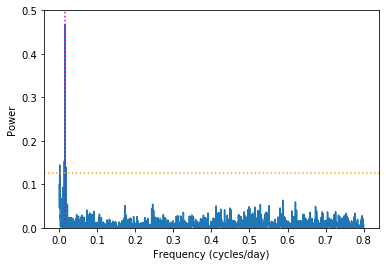

In [60]:
# Plot the periodogram

plt.plot(mfreq,mpower)
plt.axvline(f_max,color='m',ls=':')
plt.axhline(sl_peak_power[98],ls=':',color="orange")
plt.ylim([0,0.5])
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")
plt.show()

The period is significant at the 99% level.

In [62]:
# 3.4 Horne & Baliunas FAP

Neff = np.max(mfreq) * T # This is a factor of 10 lower than my number of frequencies in the array,
#because they are not all independent

Z = 0.45 #read from the graph
Psingle = 1 - math.exp(-1*Z)
print("Psingle",Psingle)

FAP = (1 - Psingle)**Neff
print(FAP)

Psingle 0.36237184837822667
2.4901094556744983e-233


The Horne & Baliunas FAP is very low, in agreement with the bootstrapping that the a detection at the power is highly unlikely due to random noise.

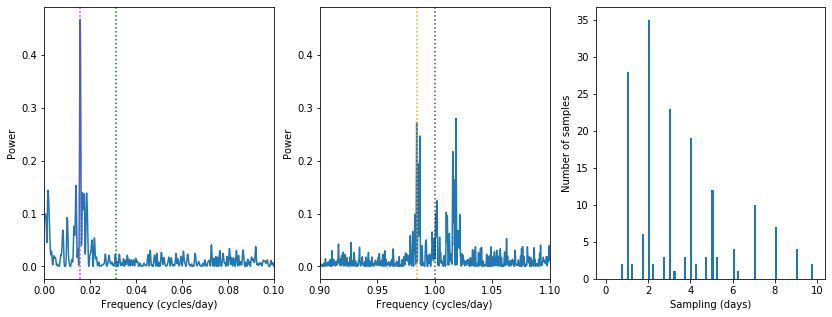

In [77]:
# 3.5 Peaks in the periodogram


ax = plt.subplots(figsize=(14,5))
plt.subplot(131)
plt.plot(freq,power)
plt.axvline(f_max,color='magenta',ls=':')
plt.axvline(2*f_max,color='green',ls=':')
plt.xlim([0.0,0.1])
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")

plt.subplot(132)
plt.plot(freq,power)
plt.axvline(1,color='black',ls=':',alpha=0.7)
plt.axvline(1-f_max, color='orange', ls=':')
plt.xlim([0.9,1.1])
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")

# Investigate the sampling and duration
hjd_shift = np.asarray(lc.hjd[:-1])
hjd_noshift = np.asarray(lc.hjd[1:])
T = hjd_noshift[-1]-hjd_shift[0]

intervals = hjd_noshift - hjd_shift
plt.subplot(133)
mybins2 = np.arange(0,10,0.1)
plt.hist(intervals,bins=mybins2)
plt.xlabel("Sampling (days)")
plt.ylabel("Number of samples")

plt.show()

In the left plot you can see the peak frequency in <span style="color:magenta">pink</span>. There are no apparent harmonics (in <span style="color:green">green</span>). In the middle plot you can see the peak due to the daily sampling (<span style="color:gray">grey</span> line), and you can see the aliasing of the peak frequency with the sampling by the <span style="color:orange">orange</span> peak. Reflection of the peaks about the Nyquist frequency (0.5 day) is also clear.




In [81]:
print(1/f_max)

63.57905982905982


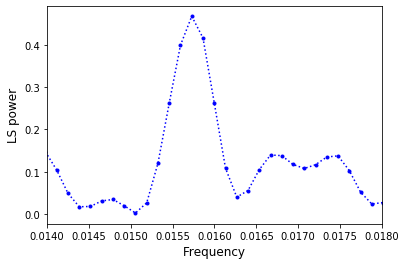

In [79]:
# 2.6 Estimate the error on your period determination

plt.plot(mfreq,mpower,'b.',ls=":")
plt.xlim([0.014,0.018])
#plt.ylim([0,0.3])
plt.xlabel("Frequency",fontsize=12)
plt.ylabel("LS power",fontsize=12)
plt.show()

From this zoomed in version of the peak period in the periodogram, we can estimate the FWHM of the peak to be 0.0163 - 0.0150 = 0.0013 cycles/day. Then $\sigma=\mathrm{FWHM}/2.54 = 0.000511$. So the error in the period is $\Delta P = 1/f^2\Delta f = 2.067$ days.  

$P = 63\pm 2$ days



## Question 4
Use Jake VanderPlas's function below to create data to show that the periodogram peak width does not depend on either the number of data points, nor the signal-to-noise of the data.

We'll run with for N = 10, 100, 1000, 10000.


In [42]:
def create_data(N, T=4, signal_to_noise=5, period=1.0, random_state=None):
    rng = np.random.RandomState(random_state)
    t = T * rng.rand(N)
    dy = 0.5 / signal_to_noise * np.ones_like(t)
    y = np.sin(2 * np.pi * t / period) + dy * rng.randn(N)
    return t, y, dy

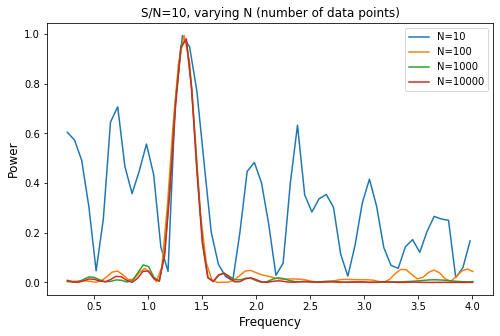

In [44]:
# Varying the number of data points in the lightcurve 
# SN fixed at the default of 5

ax = plt.subplots(figsize=(8,5))
for i in range (0,4):
    
    #scale peaks with number of data points
    
    if (i==0): N = 10
    if (i==1): N = 100
    if (i==2): N = 1000
    if (i==3): N = 10000
        
    # generate the data
    t,y,dy = create_data(N,period=0.75,signal_to_noise=10)
    
    # run the LS, keeping the output frequencies the same
    f,p = LombScargle(t,y).autopower(minimum_frequency=1/4, maximum_frequency = 4)
    
    plt.plot(f,p)

plt.xlabel("Frequency",fontsize="12")
plt.ylabel("Power",fontsize="12")
plt.title("S/N=10, varying N (number of data points)")

plt.legend(('N=10', 'N=100', 'N=1000', 'N=10000'),
           loc='upper right')
plt.show()
    


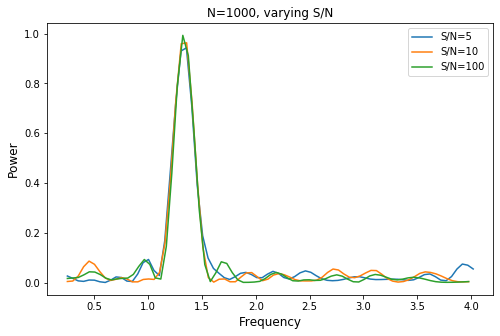

In [45]:
# Vary peaks with SNR
# Keep N = 1000
ax = plt.subplots(figsize=(8,5))
for i in range (0,3):
    
    #scale peaks with signal-to-noise
    
    if (i==0): SN = 4
    if (i==1): SN = 10
    if (i==2): SN = 100
        
    # generate the data
    t,y,dy = create_data(100,period=0.75,signal_to_noise=SN)
    
    # run the LS, keeping the output frequencies the same
    f,p = LombScargle(t,y).autopower(minimum_frequency=1/4, maximum_frequency = 4)
    
    plt.plot(f,p)

plt.xlabel("Frequency",fontsize="12")
plt.ylabel("Power",fontsize="12")
plt.title("N=1000, varying S/N")    
plt.legend(('S/N=5','S/N=10', 'S/N=100'),loc='upper right')
plt.show()
    

4.2 It's clear that neither the number of the data points, nor the signal-to-noise, influences the peak width. (For very low $N$, the frequency resolution of the LS periodogram is low, and this may appear to affect the peak width.)

However, the siginficance of the peak increases as we increase the number of data points ($N$) in the lightcurve. This can be seen by the height of the peak relative to other peas/noise in the periodogram. The significance of the peak also improves as the signal-to-noise of our data increases, but this change is far less pronounced than the change due to the number of samples ($N$). You could verify this by running a bootstrap to get e.g. the 99% significance level for each of these scenarios.